# 0.netcdf概要

In [31]:
# netcdfの読み込み　datasetクラスで読み込もつroot groupが生成される
from netCDF4 import Dataset
nc = Dataset('/workspaces/akita_daizu/data/netcdf/TMP_AVE.NC', 'r')
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: 2022-01-19 02:17:00 GMT Hyrax-1.13.4 https://amd.rd.naro.go.jp:443/opendap/AMD/Area1/2021/AMD_Area1_Cli_TMP_mea.nc.nc?geogrid(TMP_mea,40.34763205639712,140.00639579051995,40.20499263124444,140.14306947743816,"44194<time","time<44519")
    dimensions(sizes): time(324), lat(19), lon(12)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(lon), float32 TMP_mea(time, lat, lon)
    groups: 

In [32]:
# 観測次元
nc.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 324,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 19,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 12}

In [33]:
# 格納されている値
nc.variables.keys()

dict_keys(['time', 'lat', 'lon', 'TMP_mea'])

In [34]:
#　格納されている値の内容を確認できる
nc['TMP_mea']
# データ構造は3次元　単位はdegC 大気温　セルシウス温度

<class 'netCDF4._netCDF4.Variable'>
float32 TMP_mea(time, lat, lon)
    _FillValue: 9.96921e+36
    long_name: Mean air temperature
    units: degC
unlimited dimensions: 
current shape = (324, 19, 12)
filling on

In [35]:
nc['time']
# 日時は1900/1/1から換算される値　1次元しかない

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: 9.969209968386869e+36
    calendar: standard
    units: days since 1900-1-1 00:00:0.0
unlimited dimensions: 
current shape = (324,)
filling on

In [37]:
# 以下のように入手したいItemと座標を定義することで値を取得できる
nc['TMP_mea'][100][10][10]

7.302135

In [8]:
# 次元の変数をインデックスで指定するとmasked_arrayが帰ってくる
nc['time'][100]

masked_array(data=44295.,
             mask=False,
       fill_value=1e+20)

In [38]:
# 型指定すると変数だけ帰ってくる
print(float(nc['time'][100]))


44295.0


In [39]:
# この時帰ってくる値は1900年からの日数だから以下の式で変換可能
from datetime import date, timedelta
start = date(1900,1,1) 
delta = timedelta(float(nc['time'][0]))
print(start + delta)   

2021-01-01


# 1.解析対象ポリゴンの読み込み


xarrayで圃場の位置で値を抽出するためポリゴンの位置をxarrayで’利用できる形に変更

In [1]:
import geopandas as gpd
df474 = gpd.read_file('/workspaces/akita_daizu/data/474+120圃場.geojson')

In [2]:
df474.crs

<Projected CRS: EPSG:6678>
Name: JGD2011 / Japan Plane Rectangular CS X
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - zone X
- bounds: (139.49, 37.73, 142.14, 41.58)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone X
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [3]:
# crsをメッシュデータに合わせる
df474 = df474.to_crs("EPSG:4612")
df474.crs

<Geographic 2D CRS: EPSG:4612>
Name: JGD2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
# 圃場ポリゴンの重心を求めて新たな列に定義
df474_min_xy = df474
df474_min_xy['lon'] = (df474_min_xy['geometry'].centroid.x)
df474_min_xy['lat'] = (df474_min_xy['geometry'].centroid.y)

/tmp/ipykernel_3195/2199925725.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df474_min_xy['lon'] = (df474_min_xy['geometry'].centroid.x)
/tmp/ipykernel_3195/2199925725.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df474_min_xy['lat'] = (df474_min_xy['geometry'].centroid.y)


In [5]:
df474_min_xy

,Unnamed: 0,id,Address,CityCode,Address_2,LandCatego,Area,Agricult_1,Jurisdicti,名前_漢,...,sensor_loc,distance,uniqueID,作付年_y,H23以前_y,播種月日,pred_labels,geometry,lon,lat
0,0,05100030469-068904,秋田県八峰町峰浜沼田坊塚下1-6,53490.0,秋田県八峰町峰浜沼田坊塚下1-6,1.0,1774.0,農業振興地域内・農用地区域内,八峰町農業委員会,斉藤 モヨ,...,NaN,1650.0,3.0,None,☑,2021-07-04,1.0,"MULTIPOLYGON (((140.02273 40.27168, 140.02273 ...",140.023139,40.271598
1,1,05100031429-064065,秋田県八峰町峰浜塙下才神187,53490.0,秋田県八峰町峰浜塙下才神187,1.0,3012.0,農業振興地域内・農用地区域内,八峰町農業委員会,藤嶋 久徳,...,NaN,15875.0,104.0,None,☑,2021-06-27,3.0,"MULTIPOLYGON (((140.07939 40.28082, 140.07948 ...",140.079940,40.280625
2,2,05100031451-064046,秋田県八峰町峰浜塙下才神186,53490.0,秋田県八峰町峰浜塙下才神186,1.0,2936.0,農業振興地域内・農用地区域内,八峰町農業委員会,藤嶋 久徳,...,NaN,15900.0,105.0,None,☑,2021-06-27,1.0,"MULTIPOLYGON (((140.07983 40.28120, 140.08052 ...",140.080159,40.280822
3,3,05100031472-064026,秋田県八峰町峰浜塙下才神185,53490.0,秋田県八峰町峰浜塙下才神185,1.0,1324.0,農業振興地域内・農用地区域内,八峰町農業委員会,藤嶋 久徳,...,NaN,15925.0,106.0,None,☑,2021-06-27,3.0,"MULTIPOLYGON (((140.07984 40.28121, 140.08006 ...",140.080393,40.281016
4,4,05100030885-068966,秋田県八峰町峰浜沼田黒トフ5-2,53490.0,秋田県八峰町峰浜沼田黒トフ5-2,1.0,1239.0,農業振興地域内・農用地区域内,八峰町農業委員会,小林 信夫,...,NaN,2075.0,10.0,None,☑,2021-07-04,3.0,"MULTIPOLYGON (((140.02155 40.27555, 140.02317 ...",140.022372,40.275335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,471,05100034652-067022,秋田県八峰町峰浜目名潟中渡上台178,NaN,None,NaN,NaN,None,None,None,...,NaN,NaN,NaN,None,☑,2021-07-08,5.0,"MULTIPOLYGON (((140.04426 40.30916, 140.04423 ...",140.044834,40.309421
472,472,05100030625-063981,秋田県八峰町峰浜石川外林308,NaN,None,NaN,NaN,None,None,None,...,NaN,NaN,NaN,None,☑,2021-06-28,3.0,"MULTIPOLYGON (((140.08155 40.27357, 140.08149 ...",140.081011,40.273390
473,473,05100032510-064783,秋田県八峰町峰浜塙館越89-1,NaN,None,NaN,NaN,None,None,None,...,NaN,NaN,NaN,None,☑,2021-06-30,3.0,"MULTIPOLYGON (((140.07104 40.29000, 140.07104 ...",140.071390,40.290302
474,474,05100033587-064704,秋田県八峰町峰浜塙野田堤下1-6,NaN,None,NaN,NaN,None,None,None,...,NaN,NaN,NaN,None,☑,2021-07-03,5.0,"MULTIPOLYGON (((140.07249 40.29984, 140.07192 ...",140.072211,40.300010


# 2.各気象データの解析

## 2-1.気温データの解析

In [6]:
import xarray as xr
TMP_ave = xr.open_dataarray('/workspaces/akita_daizu/data/netcdf/TMP_AVE.NC')

In [7]:
import xarray as xr
TMP_mea = xr.open_dataarray('/workspaces/akita_daizu/data/netcdf/TMP_mea.NC')

In [10]:
#  ここXarrayの機能でもっと合理的に表示できないか？
# DataarrayからDF作成　各ｘｙごとにArray抽出してDFにappendする
import pandas as pd
dfObj = pd.DataFrame()
for i in range (474):
    lat1 = df474_min_xy['lat'][i]
    lon1 = df474_min_xy['lon'][i]
    location_df = TMP_mea.sel(lat=lat1, lon=lon1, method="nearest").to_dataframe()
    dfObj = dfObj.append(location_df)

In [12]:
TMP_mea

<xarray.DataArray 'TMP_mea' (time: 354, lat: 19, lon: 12)>
array([[[      nan, -4.045303, ..., -6.115473, -6.394793],
        [      nan,       nan, ..., -5.790204, -6.017304],
        ...,
        [-3.713254, -3.812381, ..., -4.649928, -4.838561],
        [-3.712568, -3.912114, ..., -4.891845, -5.186108]],

       [[      nan, -4.224566, ..., -6.316828, -6.612587],
        [      nan,       nan, ..., -5.993448, -6.231915],
        ...,
        [-3.813879, -3.912587, ..., -4.808039, -5.025463],
        [-3.812985, -4.012195, ..., -5.041689, -5.376506]],

       ...,

       [[      nan,  1.674922, ..., -1.153211, -1.488697],
        [      nan,       nan, ..., -0.859226, -1.190724],
        ...,
        [ 1.184345,  1.08682 , ...,  0.043421, -0.196952],
        [ 1.185   ,  0.987421, ..., -0.257518, -0.503736]],

       [[      nan,  2.658172, ...,  0.360351,  0.065411],
        [      nan,       nan, ...,  0.6712  ,  0.379474],
        ...,
        [ 2.688328,  2.588053, ...,  1.693736,  1.495184],
        [ 2.688455,  2.488041, ...,  1.400643,  1.195556]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-20
  * lat      (lat) float32 40.35 40.35 40.34 40.33 ... 40.23 40.22 40.21 40.2
  * lon      (lon) float32 140.0 140.0 140.0 140.0 ... 140.1 140.1 140.1 140.1
Attributes:
    long_name:  Mean air temperature
    units:      degC

In [11]:
dfObj

,lat,lon,TMP_mea
time,,,
2021-01-01,40.270832,140.018753,-3.726170
2021-01-02,40.270832,140.018753,-3.846061
2021-01-03,40.270832,140.018753,-1.335601
2021-01-04,40.270832,140.018753,-0.623385
2021-01-05,40.270832,140.018753,-2.204713
...,...,...,...
2021-12-16,40.287498,140.068756,3.140543
2021-12-17,40.287498,140.068756,3.107185
2021-12-18,40.287498,140.068756,-2.508459


In [13]:
# group 化しやすくするためlatlon接続
dfObj['xy'] = dfObj['lat'].astype(str) + ',' + dfObj['lon'].astype(str)


In [14]:
dfObj

,lat,lon,TMP_mea,xy
time,,,,
2021-01-01,40.270832,140.018753,-3.726170,"40.270832,140.01875"
2021-01-02,40.270832,140.018753,-3.846061,"40.270832,140.01875"
2021-01-03,40.270832,140.018753,-1.335601,"40.270832,140.01875"
2021-01-04,40.270832,140.018753,-0.623385,"40.270832,140.01875"
2021-01-05,40.270832,140.018753,-2.204713,"40.270832,140.01875"
...,...,...,...,...
2021-12-16,40.287498,140.068756,3.140543,"40.2875,140.06876"
2021-12-17,40.287498,140.068756,3.107185,"40.2875,140.06876"
2021-12-18,40.287498,140.068756,-2.508459,"40.2875,140.06876"


In [15]:
# indexがtimeになってしまう　とりあえずここでtimeを列にも追加
dfObj['time'] = dfObj.index
dfObj['time'] = pd.to_datetime(dfObj['time'])

In [16]:
# このDFを図化する
dfObj

,lat,lon,TMP_mea,xy,time
time,,,,,
2021-01-01,40.270832,140.018753,-3.726170,"40.270832,140.01875",2021-01-01
2021-01-02,40.270832,140.018753,-3.846061,"40.270832,140.01875",2021-01-02
2021-01-03,40.270832,140.018753,-1.335601,"40.270832,140.01875",2021-01-03
2021-01-04,40.270832,140.018753,-0.623385,"40.270832,140.01875",2021-01-04
2021-01-05,40.270832,140.018753,-2.204713,"40.270832,140.01875",2021-01-05
...,...,...,...,...,...
2021-12-16,40.287498,140.068756,3.140543,"40.2875,140.06876",2021-12-16
2021-12-17,40.287498,140.068756,3.107185,"40.2875,140.06876",2021-12-17
2021-12-18,40.287498,140.068756,-2.508459,"40.2875,140.06876",2021-12-18


In [17]:
# 座標(xy)が474箇所あって　それぞれの箇所の一年間の気温の変化なので、xyでグループ分けするとある地点の一年間の気温のデータが出てくる
dfObj.groupby('xy')

In [33]:
dfObj['xy'].unique()

array(['40.270832,140.01875', '40.279167,140.08125',
       '40.279167,140.01875', '40.2875,140.05624', '40.295834,140.05624',
       '40.2875,140.06876', '40.279167,140.06876', '40.270832,140.06876',
       '40.2875,140.08125', '40.270832,140.08125', '40.270832,140.05624',
       '40.254166,140.08125', '40.2625,140.08125', '40.279167,140.09375',
       '40.295834,140.06876', '40.295834,140.08125',
       '40.304165,140.06876', '40.304165,140.08125',
       '40.320835,140.03125', '40.329166,140.09375', '40.3375,140.09375',
       '40.270832,140.03125', '40.2875,140.09375', '40.3125,140.04375',
       '40.320835,140.04375', '40.320835,140.08125',
       '40.320835,140.06876', '40.329166,140.08125',
       '40.254166,140.09375', '40.270832,140.09375', '40.2625,140.09375',
       '40.245834,140.09375', '40.270832,140.04375',
       '40.279167,140.03125'], dtype=object)

In [26]:
# 例えば1行目の座標の一年間の気温データはこれ
dfObj.groupby('xy').get_group(dfObj['xy'].unique()[0])

,lat,lon,TMP_mea,xy,time
time,,,,,
2021-01-01,40.270832,140.018753,-3.726170,"40.270832,140.01875",2021-01-01
2021-01-02,40.270832,140.018753,-3.846061,"40.270832,140.01875",2021-01-02
2021-01-03,40.270832,140.018753,-1.335601,"40.270832,140.01875",2021-01-03
2021-01-04,40.270832,140.018753,-0.623385,"40.270832,140.01875",2021-01-04
2021-01-05,40.270832,140.018753,-2.204713,"40.270832,140.01875",2021-01-05
...,...,...,...,...,...
2021-12-16,40.270832,140.018753,3.396073,"40.270832,140.01875",2021-12-16
2021-12-17,40.270832,140.018753,3.466743,"40.270832,140.01875",2021-12-17
2021-12-18,40.270832,140.018753,-2.017520,"40.270832,140.01875",2021-12-18


## 2-2.データのプロット

してほしいこと   
TMP_AVEが平年値、Tmp_meaが2021年の実際の温度  
  
・指定した圃場の一年間の温度変化をまとめて表示  

・任意の圃場を選択するとその圃場の平年値と、２０２１年度の値が両方表示されるグラフの作成。（例えばあるxyを指定したらそのグラフを作成してくれる機能）

In [21]:
point_1_df_tmp_mean = dfObj.groupby('xy').get_group(dfObj['xy'].unique()[2])

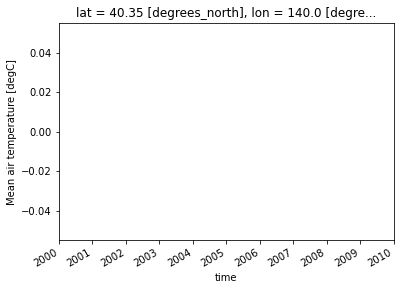

In [25]:
# xarrayの標準の機能で単品データの表示
air1d = TMP_mea.isel(lat=0, lon=0)
air1d.plot()

## 2-3.有効積算気温の計算

In [ ]:
# 基準温度10.9とするので新しい列うに10.9以下を落とした温度を追加
#meanの方のデータ操作
dfObj_12 = dfObj.groupby('xy').get_group(dfObj['xy'].unique()[12])
dfObj_12['TMP_mea_valid'] = dfObj_12['TMP_mea']-10.9
dfObj_12['TMP_mea_valid'] = dfObj_12['TMP_mea_valid'].map(lambda x:0 if x<0 else x)
dfObj_12['cumsum_tmp_mean'] = dfObj_12['TMP_mea_valid'].cumsum()
#dfObj_12.to_csv('dfObj_12.csv',index=True,encoding='utf_8_sig')



/var/folders/bl/5dd6cnz92g3303jn42cj601c0000gn/T/ipykernel_3536/2827798538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfObj_12['TMP_mea_valid'] = dfObj_12['TMP_mea']-10.9
/var/folders/bl/5dd6cnz92g3303jn42cj601c0000gn/T/ipykernel_3536/2827798538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfObj_12['TMP_mea_valid'] = dfObj_12['TMP_mea_valid'].map(lambda x:0 if x<0 else x)
/var/folders/bl/5dd6cnz92g3303jn42cj601c0000gn/T/ipykernel_3536/2827798538.py:6: SettingWithCopyWarning: 
A value is tryi

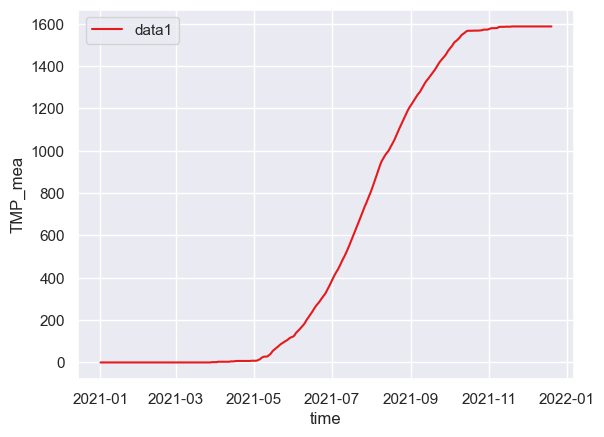

In [ ]:
plt.style.use('default')
sns.set()

sns.set_palette('Set1')

x=dfObj_12['time']

gene1 = dfObj_12['cumsum_tmp_mean']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x,gene1,label='data1')

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('TMP_mea')

plt.show()


In [ ]:
#aveの方のデータ操作．
df1bj_12 = df1bj.groupby('xy').get_group(df1bj['xy'].unique()[12])
df1bj_12['TMP_mea_valid'] = df1bj_12['TMP_mea']-10.9
df1bj_12['TMP_mea_valid'] = df1bj_12['TMP_mea_valid'].map(lambda x:0 if x<0 else x)
df1bj_12['cumsum_tmp_mean'] = df1bj_12['TMP_mea_valid'].cumsum()
#df1bj_12.to_csv('df1bj_12.csv',index=False,encoding='utf_8_sig')

/var/folders/bl/5dd6cnz92g3303jn42cj601c0000gn/T/ipykernel_3536/2493378274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1bj_12['TMP_mea_valid'] = df1bj_12['TMP_mea']-10.9
/var/folders/bl/5dd6cnz92g3303jn42cj601c0000gn/T/ipykernel_3536/2493378274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1bj_12['TMP_mea_valid'] = df1bj_12['TMP_mea_valid'].map(lambda x:0 if x<0 else x)
/var/folders/bl/5dd6cnz92g3303jn42cj601c0000gn/T/ipykernel_3536/2493378274.py:5: SettingWithCopyWarning: 
A value is tryi

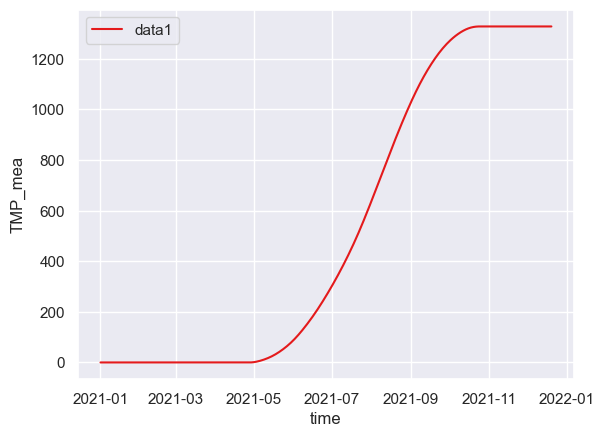

In [ ]:
plt.style.use('default')
sns.set()

sns.set_palette('Set1')

x=df1bj_12['time']

gene2 = df1bj_12['cumsum_tmp_mean']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x,gene2,label='data1')

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('TMP_mea')

plt.show()

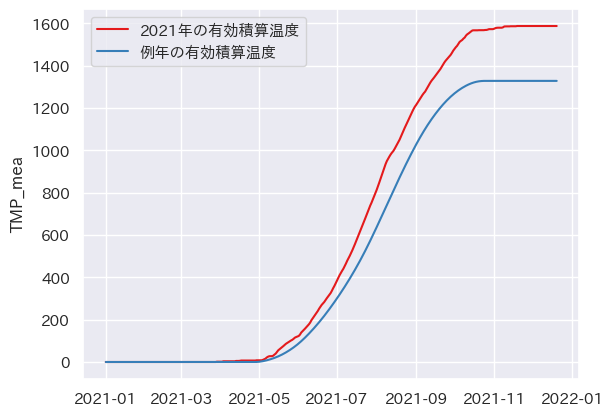

In [ ]:
plt.style.use('default')
sns.set(font='IPAexGothic')

sns.set_palette('Set1')

x=dfObj_12['time']

gene1 = dfObj_12['cumsum_tmp_mean']
gene2 = df1bj_12['cumsum_tmp_mean']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x,gene1,label='2021年の有効積算温度')
ax.plot(x,gene2,label='例年の有効積算温度')

ax.legend()

ax.set_ylabel('TMP_mea')

plt.show()

In [ ]:
#大豆が植えられてからの有効積算温度を求める．
#大豆が植えられてからのデータはエクセルで整形しました．
dfObj_12 = pd.read_csv('dfObj_12_daizu.csv')
df1bj_12 = pd.read_csv('df1bj_12_daizu.csv')

dfObj_12['cumsum_tmp_mean_daizu'] = dfObj_12['TMP_mea_valid'].cumsum()
df1bj_12['cumsum_tmp_mean_daizu'] = df1bj_12['TMP_mea_valid'].cumsum()

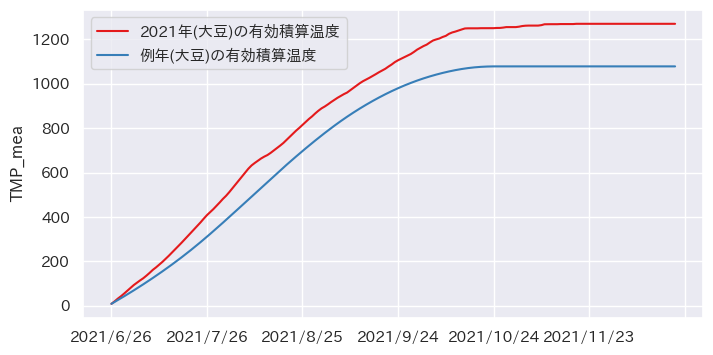

In [ ]:
plt.style.use('default')
sns.set(font='IPAexGothic')

sns.set_palette('Set1')

x=dfObj_12['time']

gene1 = dfObj_12['cumsum_tmp_mean_daizu']
gene2 = df1bj_12['cumsum_tmp_mean_daizu']
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,1,1)

plt.xticks(np.arange(0, 180 + 1, 30))

ax.plot(x,gene1,label='2021年(大豆)の有効積算温度')
ax.plot(x,gene2,label='例年(大豆)の有効積算温度')

ax.legend()
plt.xticks()
ax.set_ylabel('TMP_mea')



plt.show()